In [1]:
import os
import torch
import random 
from IPython.display import Image

# Загрузка YoloV5

In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt
%pip install -q roboflow

fatal: destination path 'yolov5' already exists and is not an empty directory.
/usr/src/app/a.shitenko/yolov5
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
setup complete using torch 1.10.1+cu113(Tesla V100-SXM2-32GB)


# Загрузка датасета

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="zW9RfdwoLnzO9nAz7qIb", model_format="yolov5",notebook="ultralytics")

In [3]:
os.environ["DATASET_DIRECTORY"]="/datasets"

In [ ]:
project = rf.workspace("codev").project("codev")
dataset = project.version(3).download("yolov5")

In [ ]:
! pip uninstall comet-ml

Found existing installation: comet-ml 3.32.8
Uninstalling comet-ml-3.32.8:
  Would remove:
    /usr/local/bin/comet
    /usr/local/lib/python3.8/dist-packages/comet_ml-3.32.8.dist-info/*
    /usr/local/lib/python3.8/dist-packages/comet_ml/*
Proceed (Y/n)? 

# Обучение

In [3]:
%cd yolov5
!python train.py --weights yolov5s.pt --cfg "models/yolov5s.yaml" --data /datasets/Codev-3/data.yaml --epochs 200 --batch-size 8 --hyp "data/hyps/hyp.scratch-high.yaml"

/usr/src/app/a.shitenko/yolov5
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=/datasets/Codev-3/data.yaml, hyp=data/hyps/hyp.scratch-high.yaml, epochs=200, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 8 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
requirements: /usr/src/app/a.shitenko/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-147-gaa7c45c Python-3.8.10 torch-2.0.0+cu118 CUDA:0 (Tesla V100-SXM2-32GB, 32511MiB)

hyperparameters: lr0=0.01, lrf=0.1, mome

# Результаты обучения

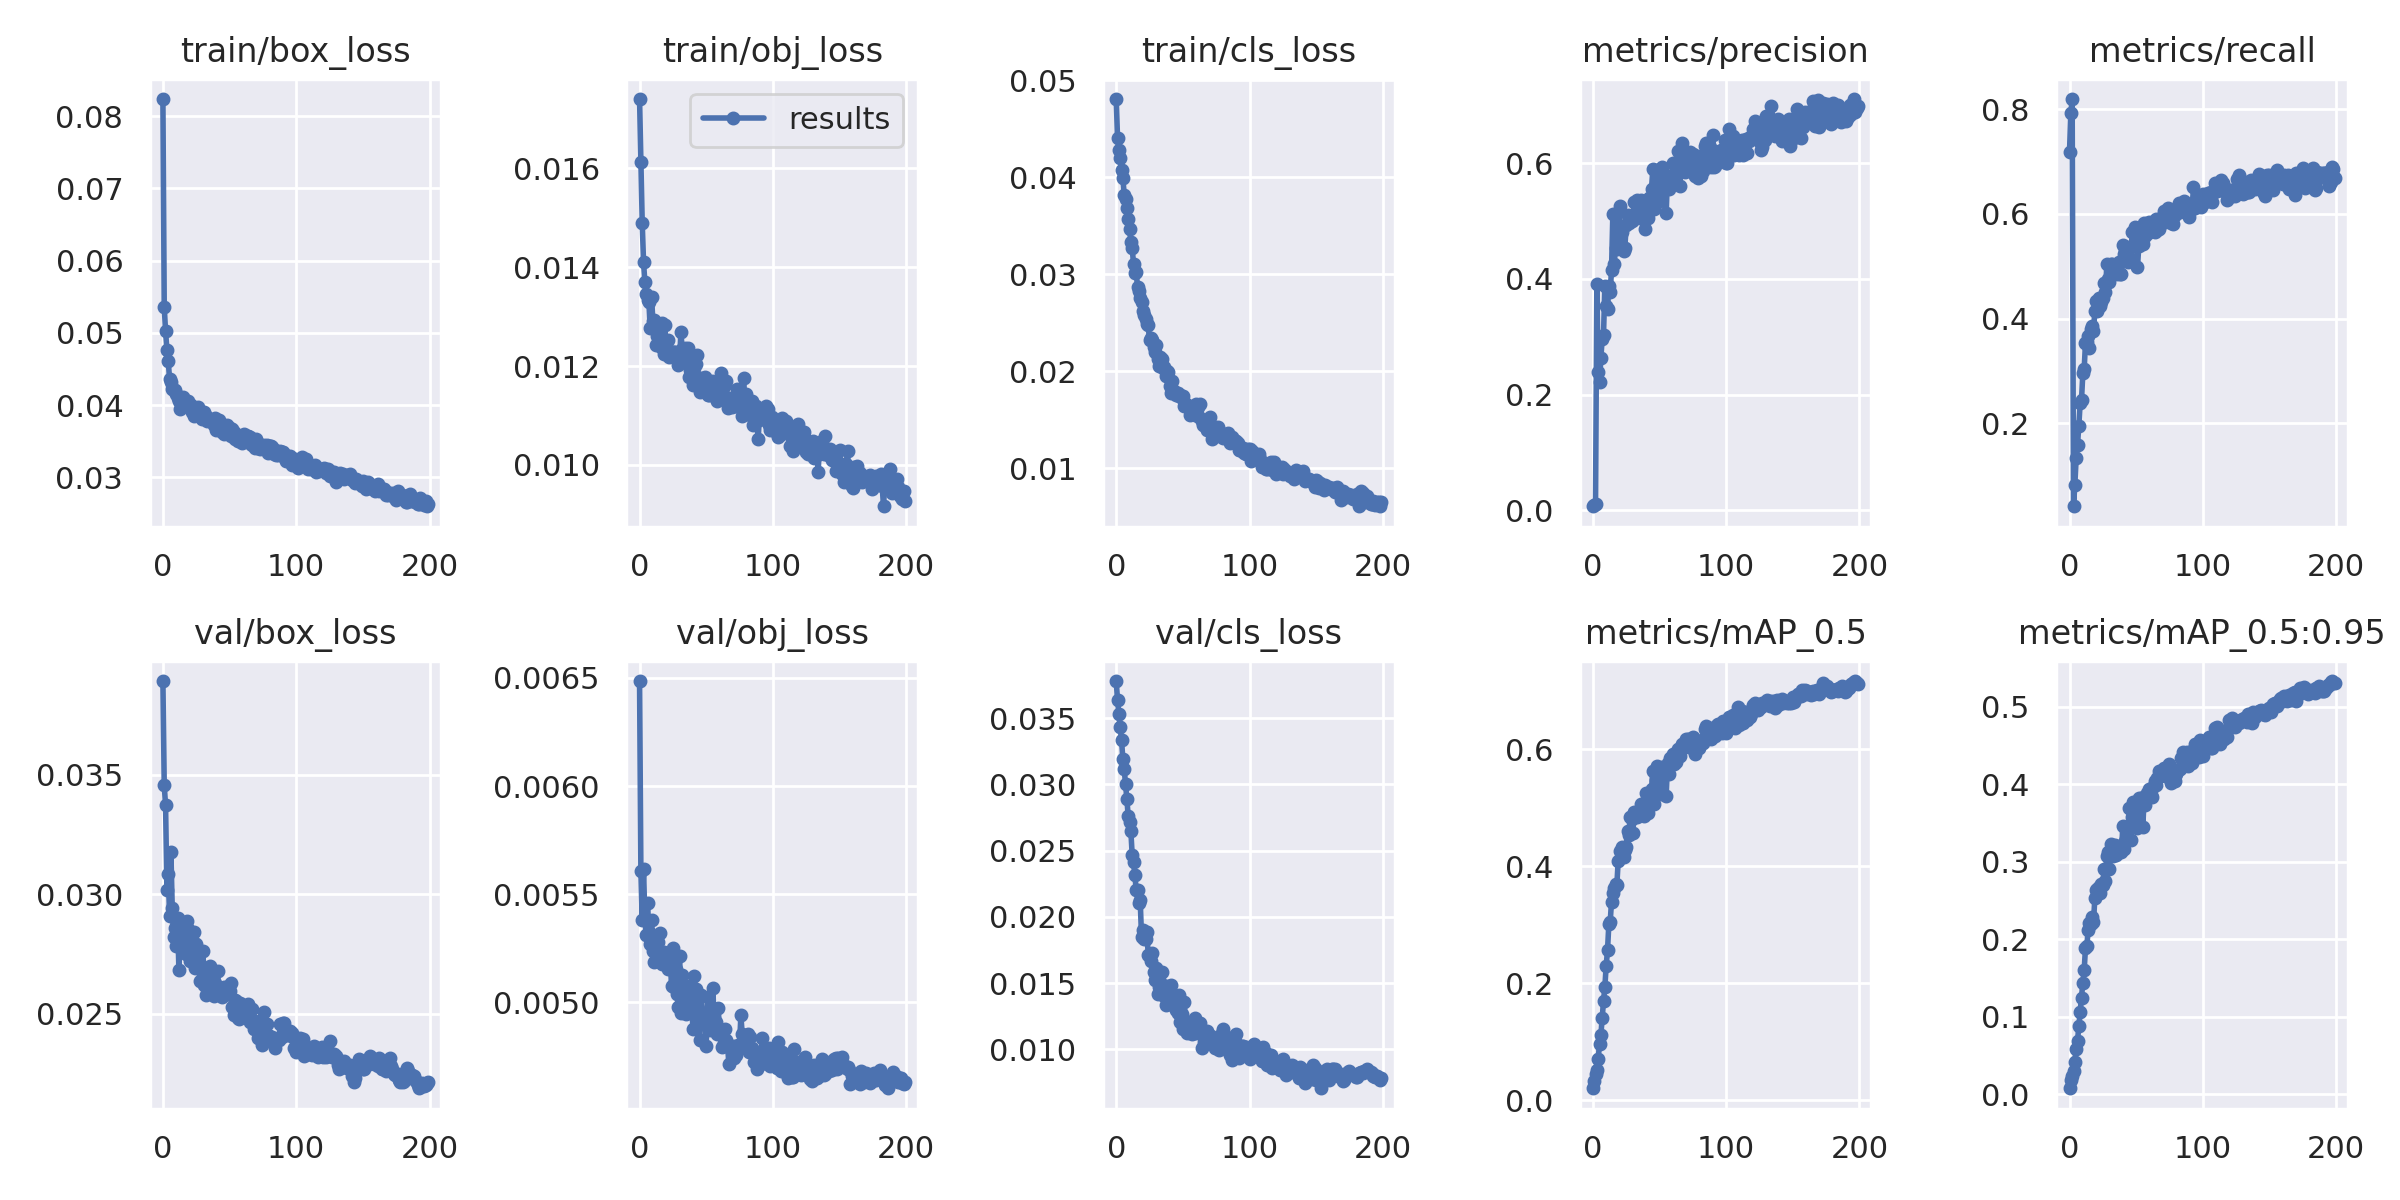

In [4]:
Image(filename='runs/train/exp25/results.png', width=1000)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

GROUND TRUTH:


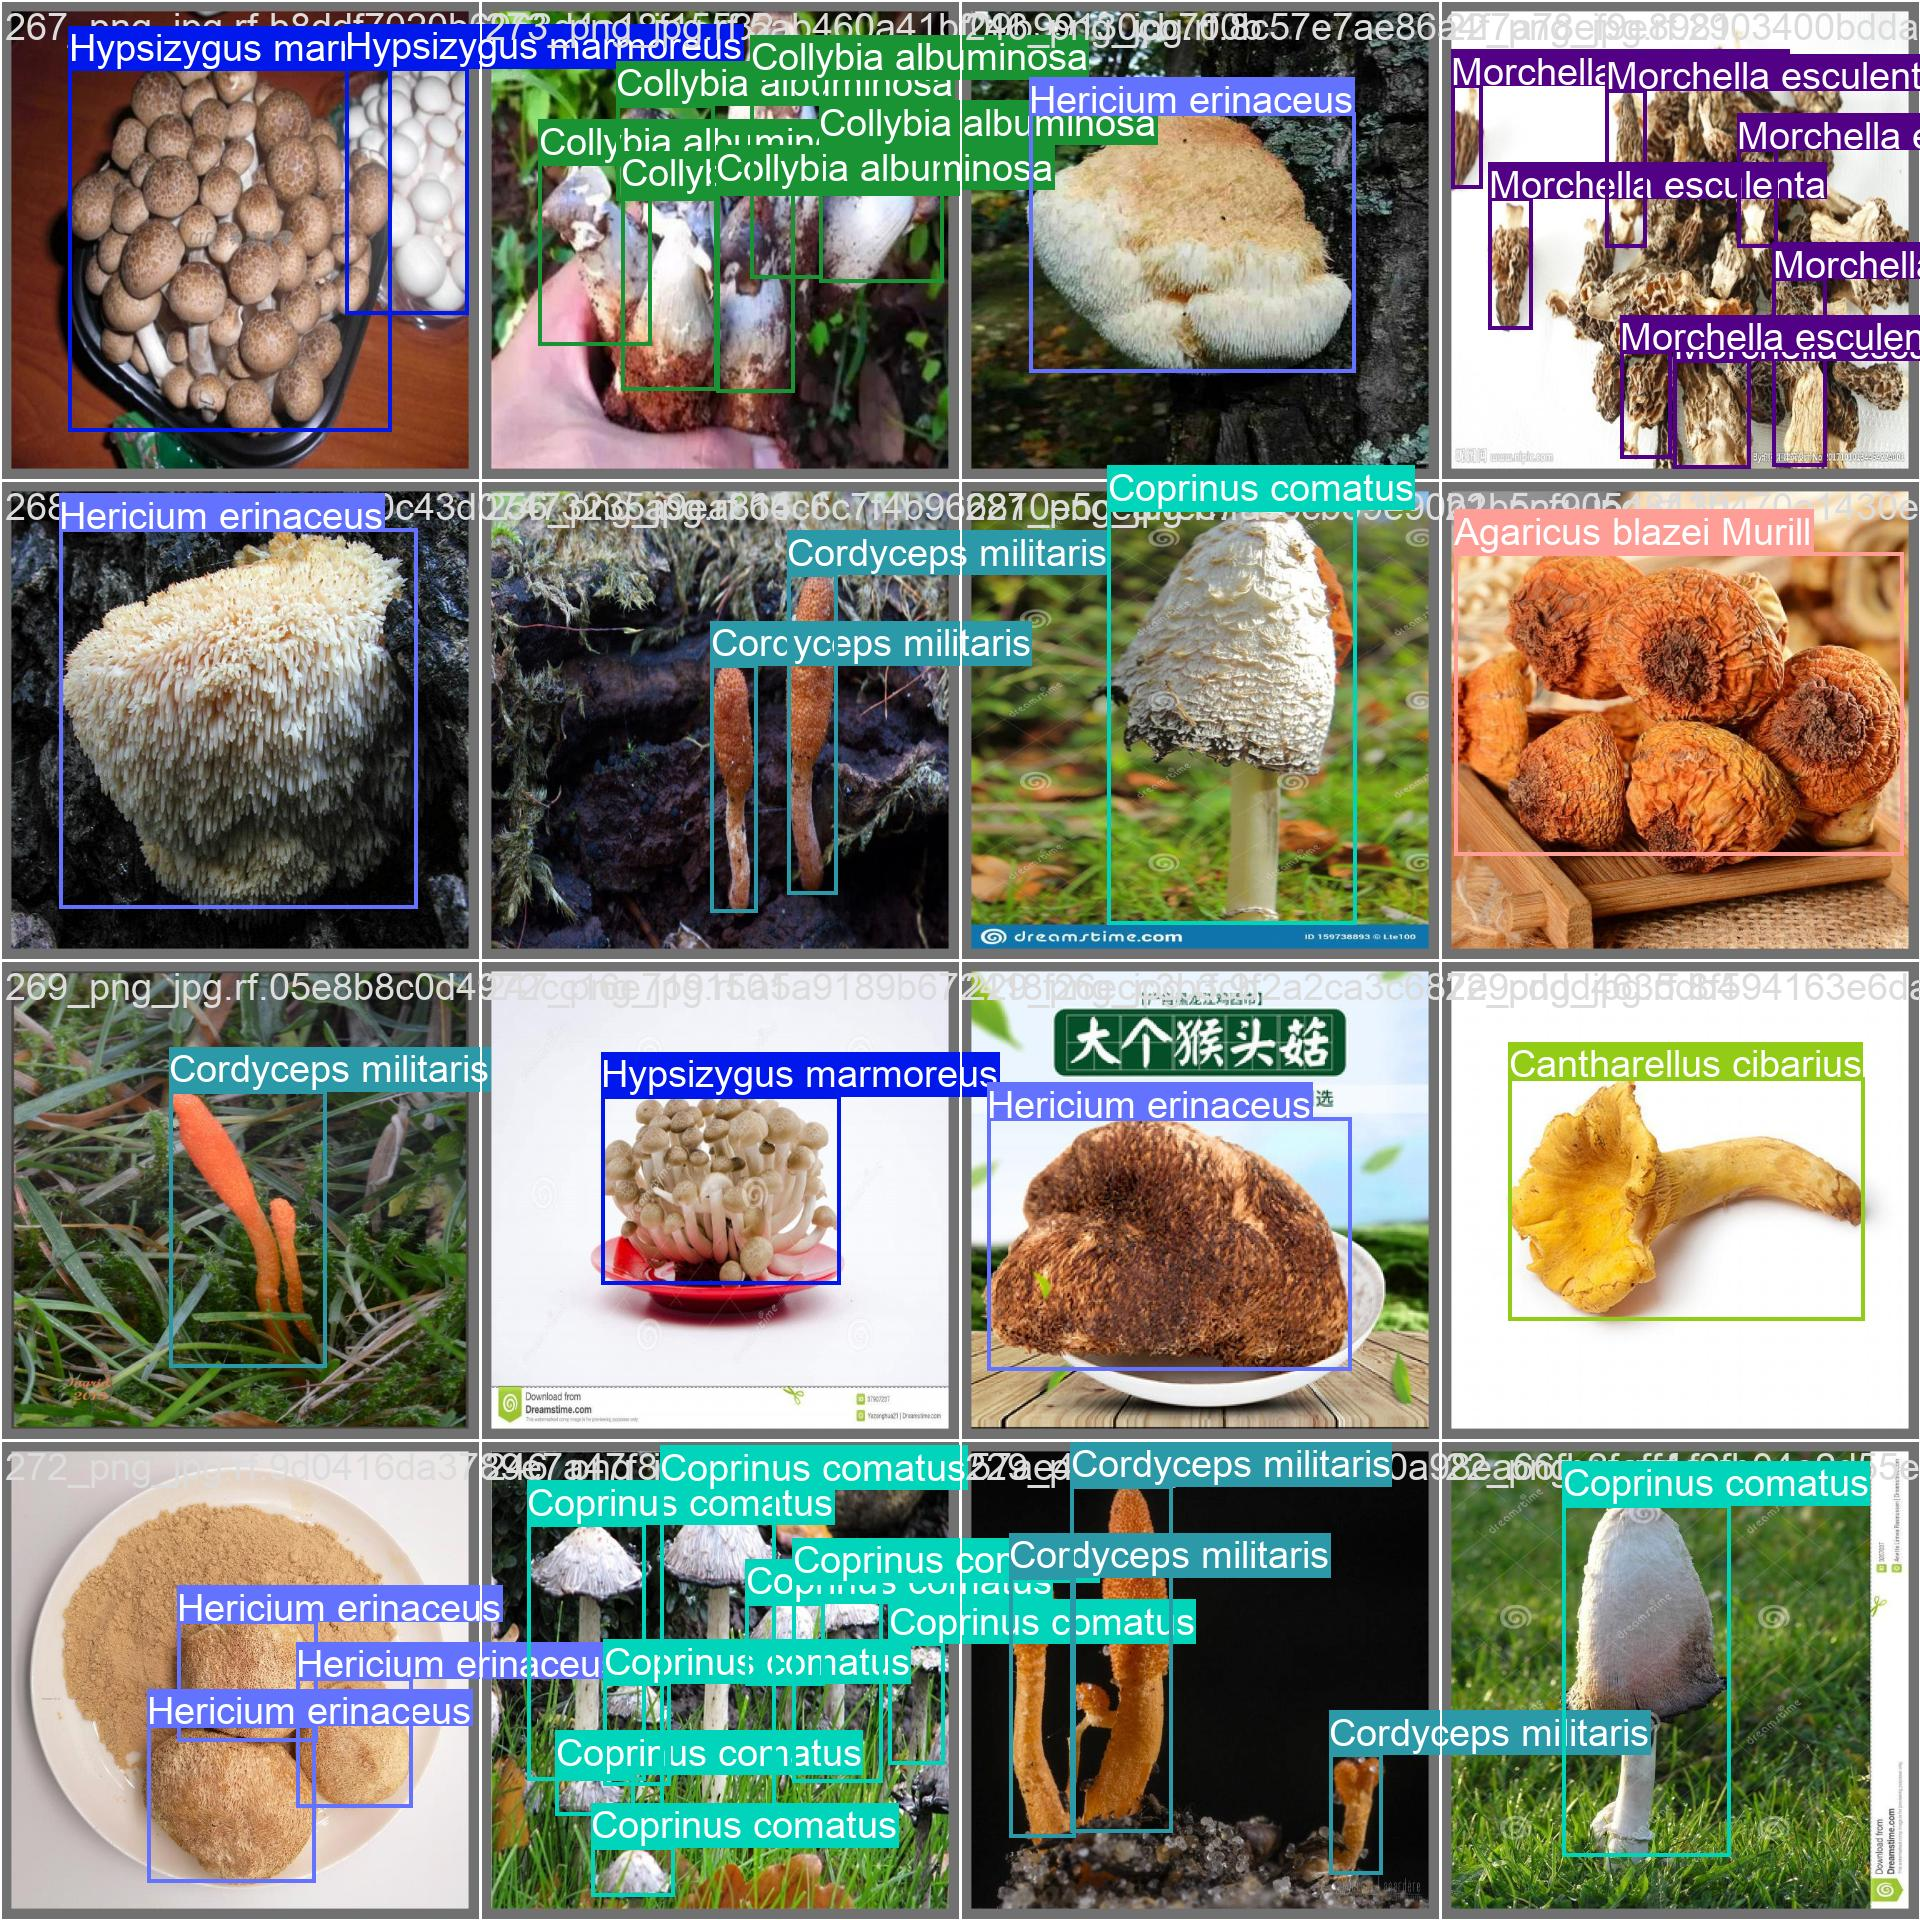

In [8]:
print("GROUND TRUTH:")
Image(filename='runs/train/exp25/val_batch1_labels.jpg', width=400)

PREDICT:


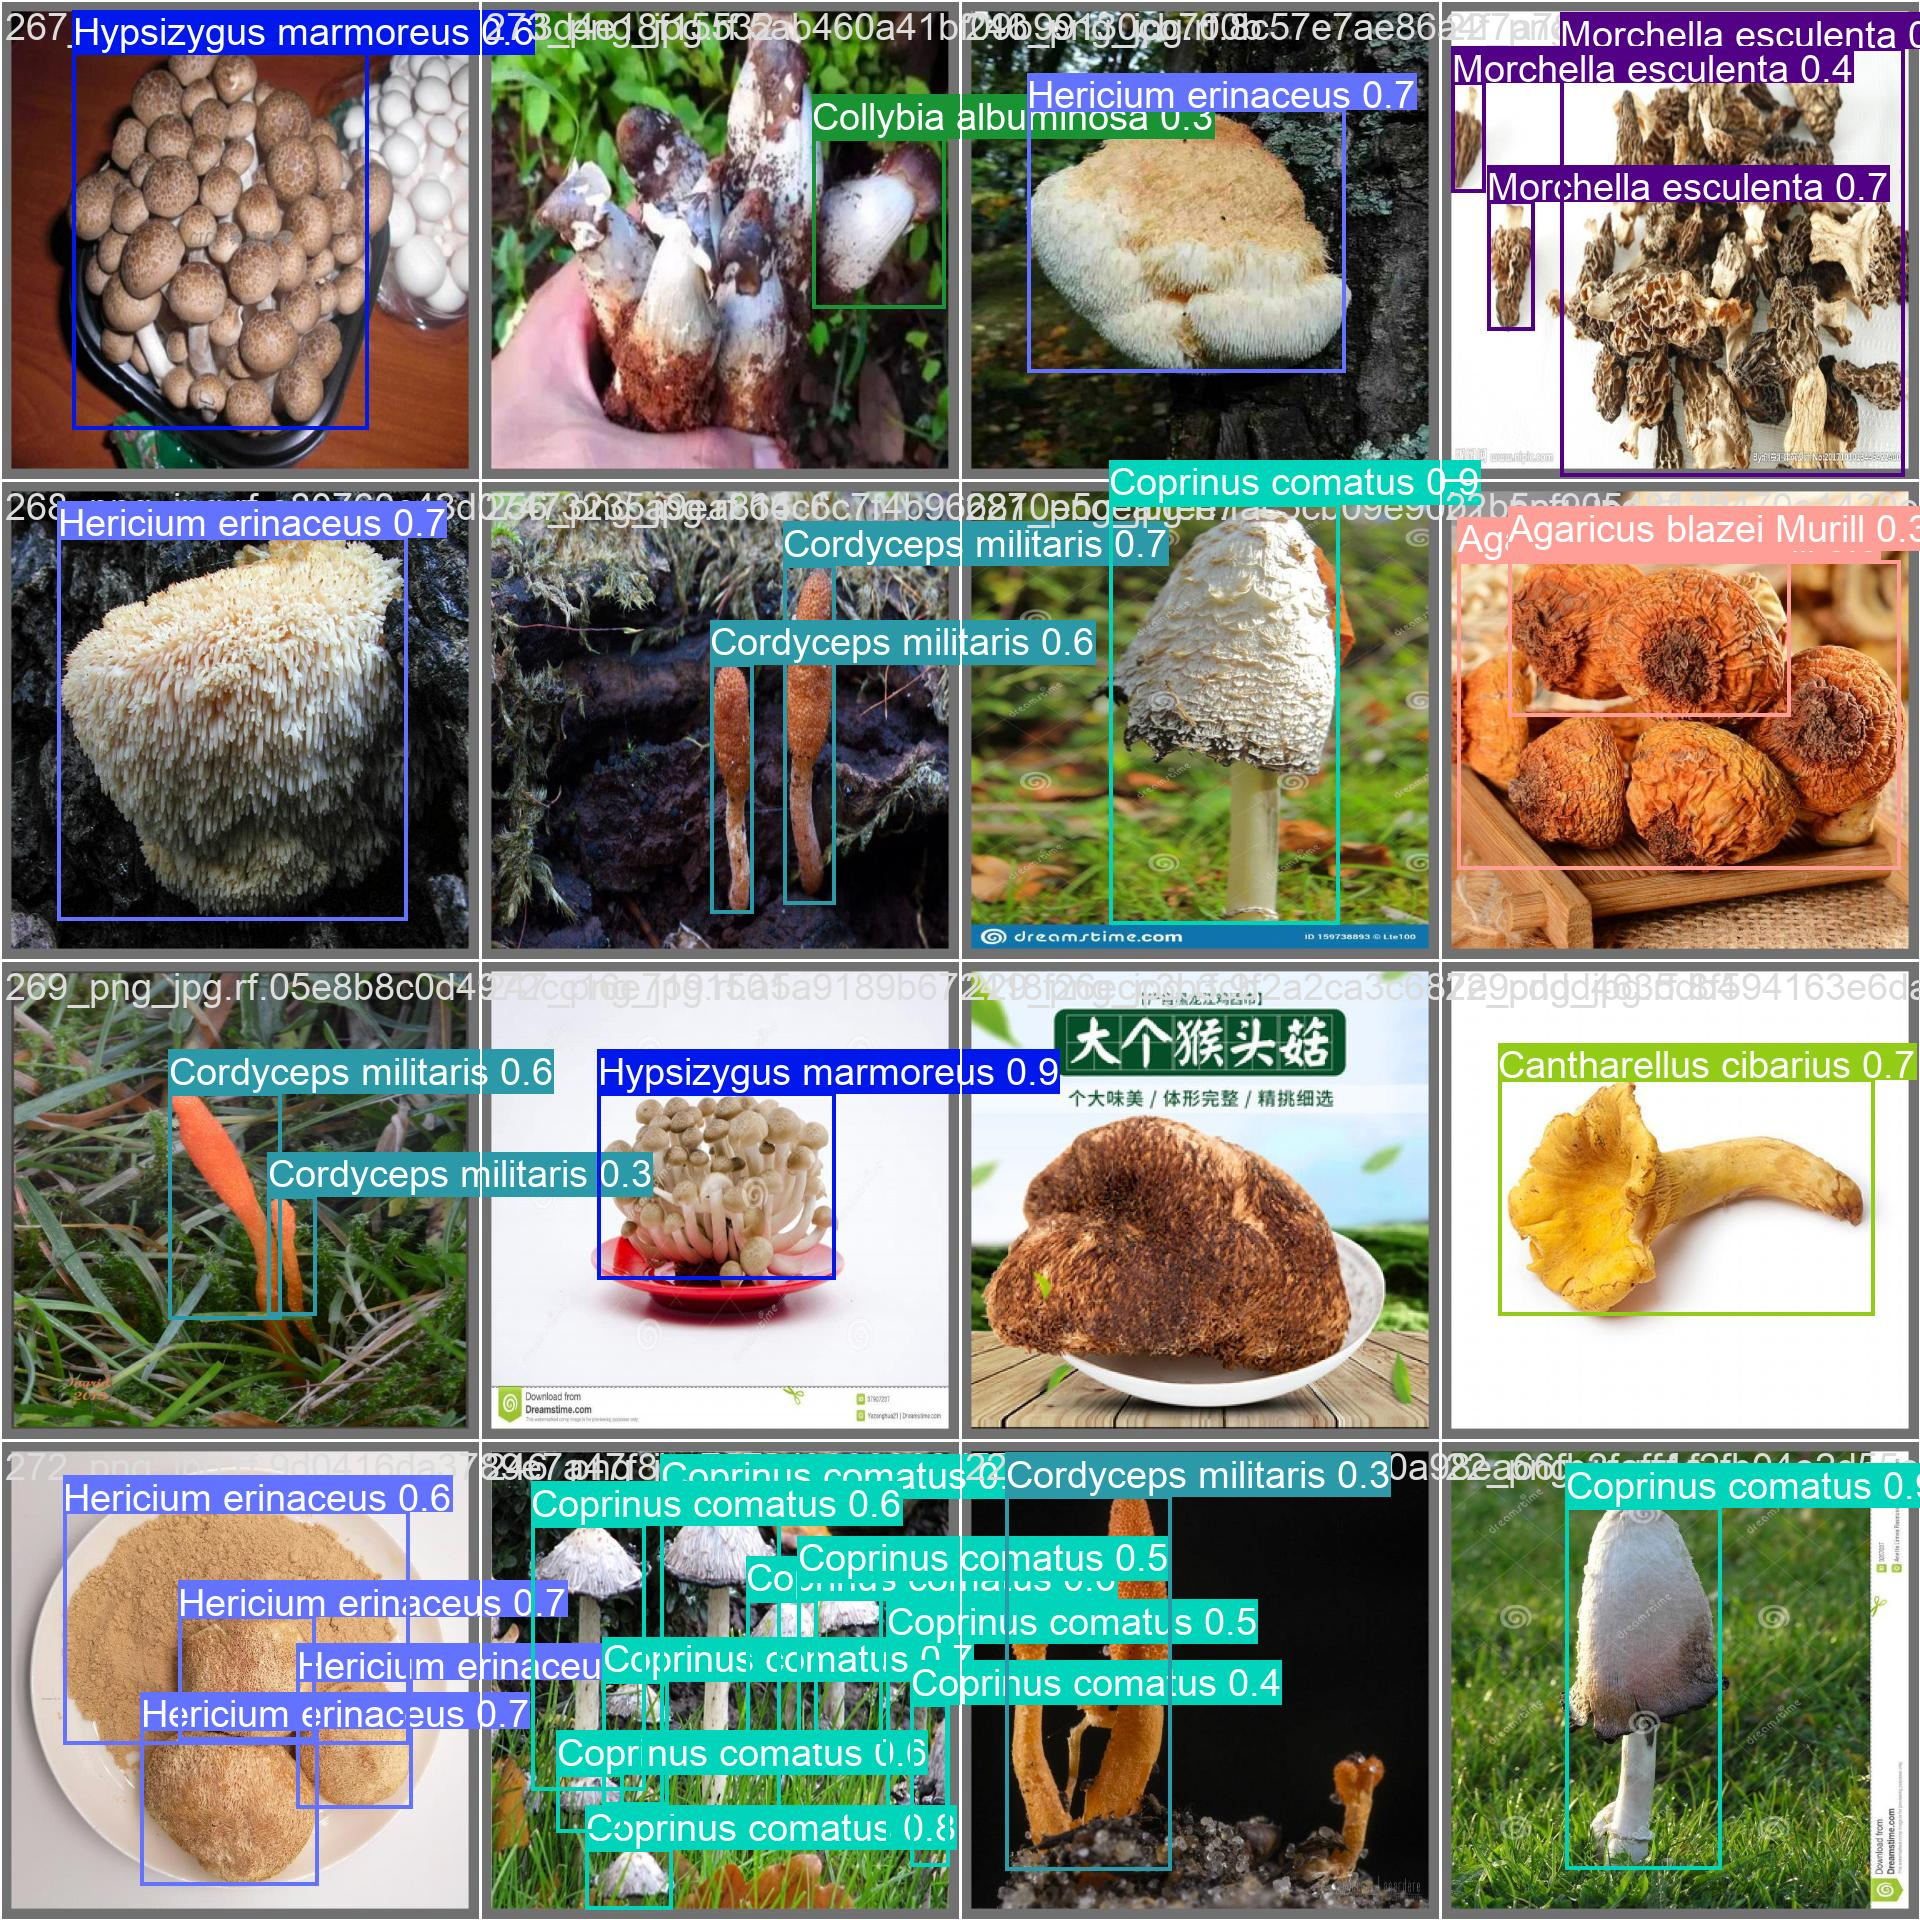

In [9]:
print("PREDICT:")
Image(filename='runs/train/exp25/val_batch1_pred.jpg', width=400)

# Тестирование

In [5]:
!python val.py --weights runs/train/exp25/weights/best.pt --data Codev3/data.yaml --task test

val: data=Codev3/data.yaml, weights=['runs/train/exp25/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
requirements: /usr/src/app/a.shitenko/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-147-gaa7c45c Python-3.8.10 torch-2.0.0+cu118 CUDA:0 (Tesla V100-SXM2-32GB, 32511MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7066762 parameters, 0 gradients, 15.9 GFLOPs
test: Scanning /usr/src/app/a.shitenko/yolov5/Codev3/test/labels.cache... 827 im
                 Class     Images  Instances          P          R      mAP50   
                   all        827       1838       0.72      0.672      0.727      0.532
     Agaricus bisporus        827         79        0.5      0.722      0.629      0.479
Agaricus blazei Murill      

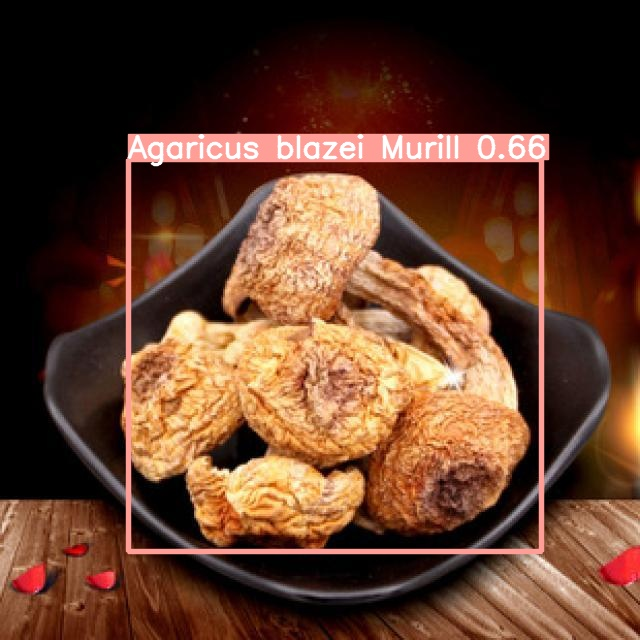

In [11]:
path="runs/detect/exp2/"
files=os.listdir(path)
d=random.choice(files)
display(Image(filename="runs/detect/exp2/"+d))